In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [22]:

X = np.random.random((N)) * 6 - 3 # -3 to +3
Y = 0.5 * X - 1 + np.random.randn(N) * 0.5 #slope 0.5, intercept -1

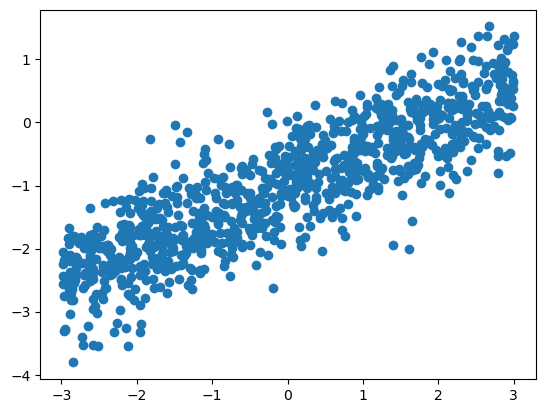

In [23]:
plt.scatter(X, Y)

In [26]:
#build the model
i = Input(shape=(1,)) #our input is a scalar (1D)
x = Dense(1)(i) #our output is also a scalar (1D) output = mx + b
#dense object is a python object but we can call it like a function
model = Model(i, x)

In [27]:
model.summary() #print a summary of the model

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

In [36]:
r = model.fit(X.reshape(-1, 1),
              Y, epochs=200, batch_size=32)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2545 - mae: 0.4004
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2550 - mae: 0.4006
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2560 - mae: 0.4013
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2551 - mae: 0.4000
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2548 - mae: 0.4004
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2547 - mae: 0.4000
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2556 - mae: 0.4015
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2549 - mae: 0.4003
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2549 - mae: 0.4002
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2546 - mae: 0.4002
Epoch 11/200
32/32 [==============================] - 0s 3m

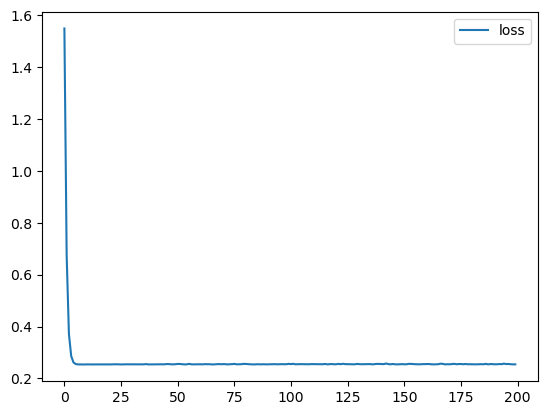

In [35]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.legend();

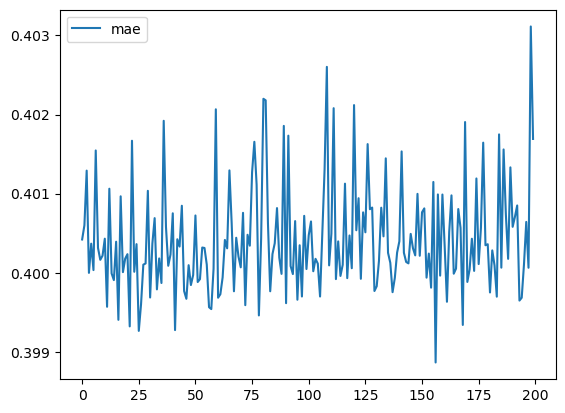

In [37]:
#Plot mae per iteration
plt.plot(r.history['mae'], label='mae')
plt.legend();


In [40]:
#Make predictions
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

1/1 [==============================] - 0s 20ms/step


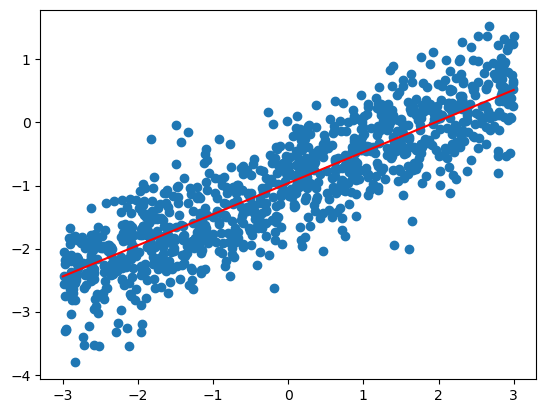

In [41]:
plt.scatter(X, Y)
plt.plot(Xtest, ptest, color='r')

In [44]:
#check the learned parameters
model.layers

In [43]:
model.layers[1].get_weights()

[array([[0.4928657]], dtype=float32), array([-0.96246964], dtype=float32)]